<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

In [113]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# add color channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# normalize
x_train, x_test = x_train/255.0, x_test/255.0
# one-hot encoding
label_train, label_test = to_categorical(y_train), to_categorical(y_test)

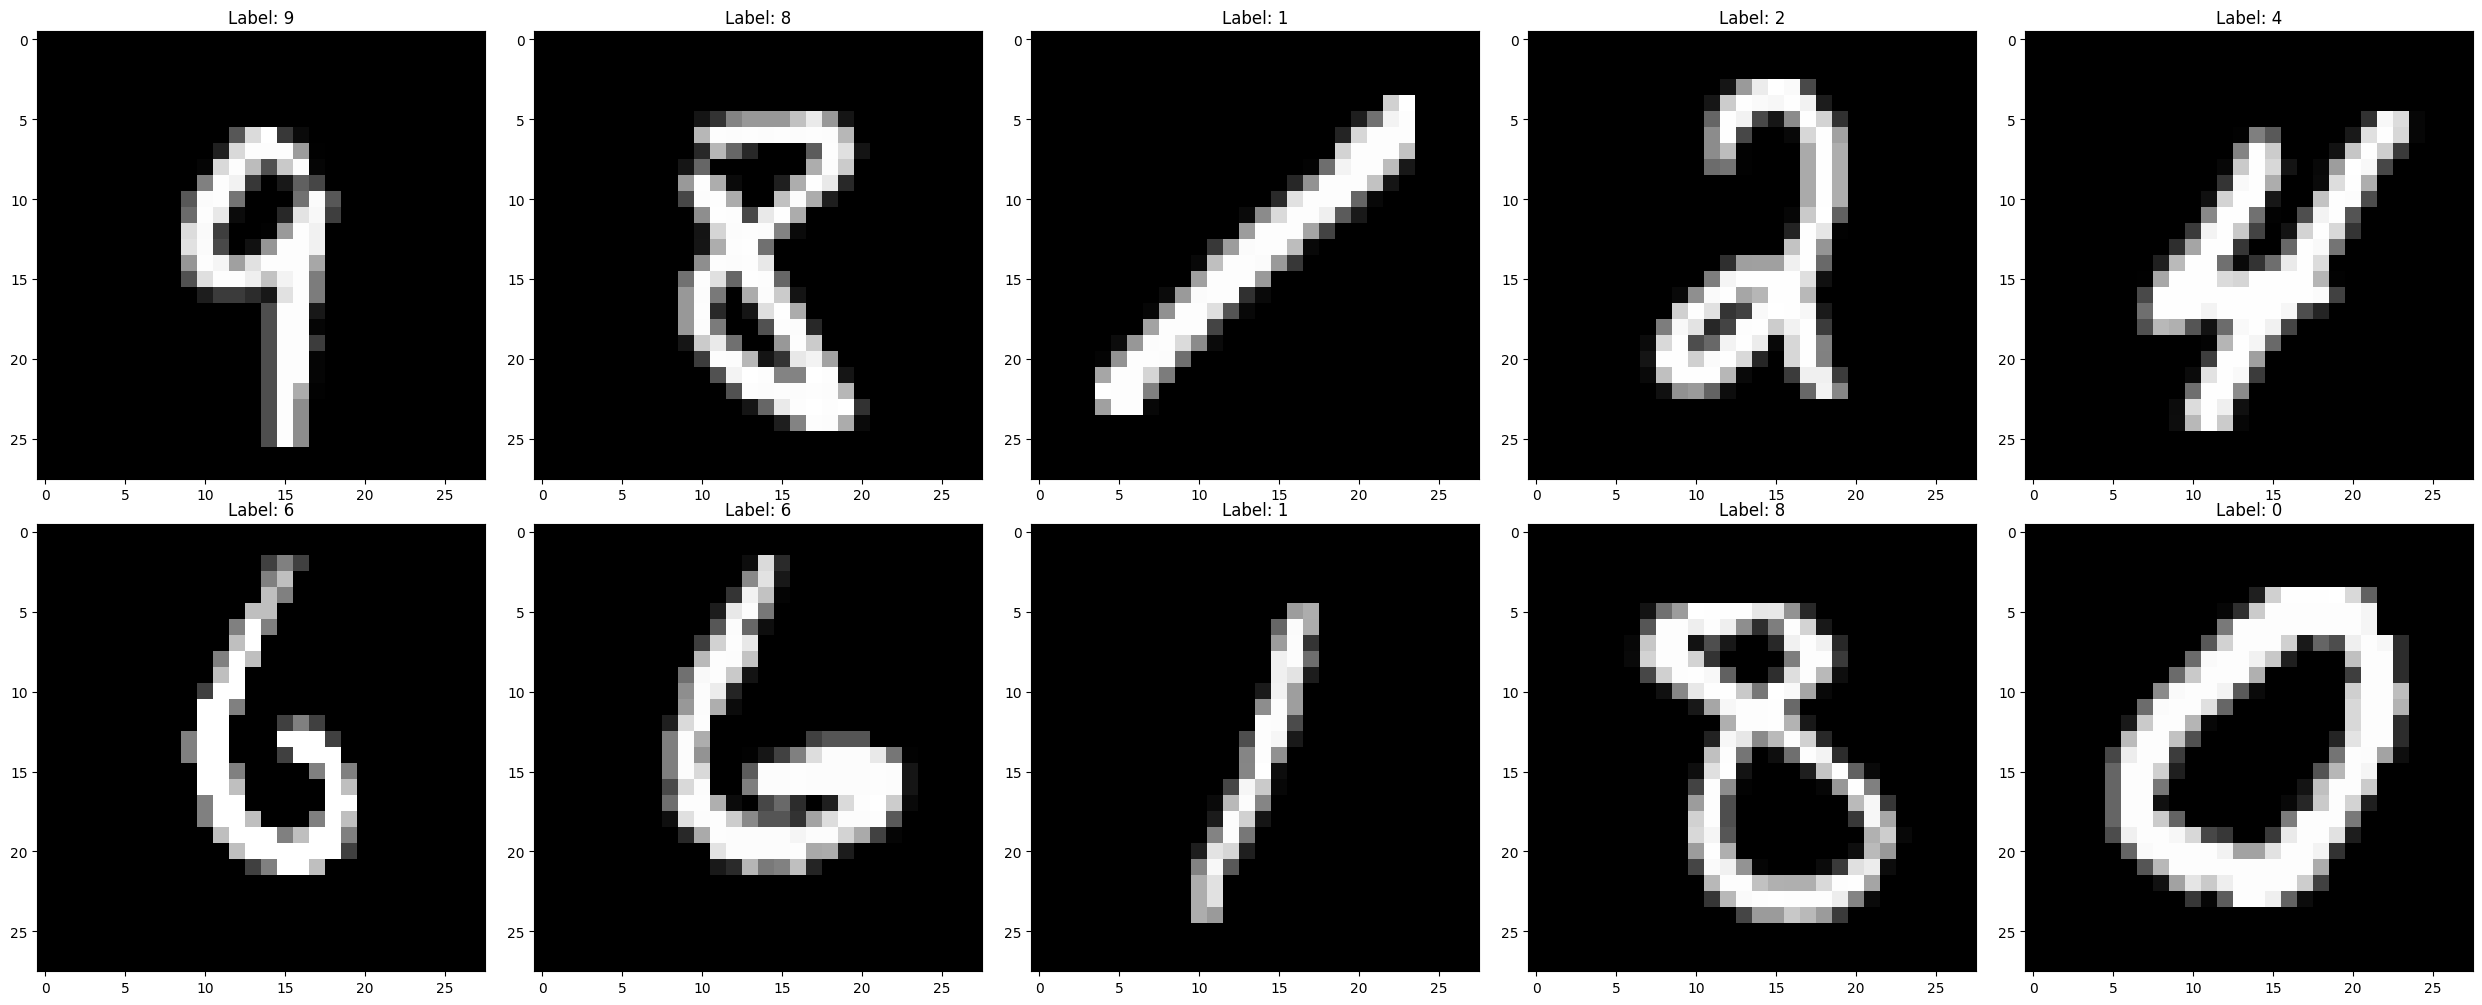

In [118]:
num_row, num_col = 2, 5

idx = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,)) # subset 10 figures
x_train_sampled, y_train_sampled = x_train[idx], y_train[idx]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(25, 10))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train_sampled[i])))
    ax.imshow(x_train_sampled[i], cmap='gray')
plt.tight_layout()
plt.show()

In [114]:
x_train.shape

(60000, 28, 28, 1)